In [3]:
#LOAD PACKAGES
import matplotlib.pyplot as plt
import numpy
import json
import pandas as pd
import scipy.cluster.hierarchy as hcluster

In [27]:
#IMPORT AND CLEAN DATA FOR CLUSTERING INPUTS
labelpath = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/coco/20221212_zooniverse_coco.json"
with open(labelpath) as f:
  cocozoo = json.load(f)

testimg = "BDA_12c_20181113_1_00425_01_07.png"
snip = []
for img in cocozoo:
    if img["filename"] == testimg:
        snip.append(img)
    else:
        continue

with open("/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/scratch_tr_vl_ts/snip.json", "w") as outfile:
    json.dump(snip, outfile)

f = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/scratch_tr_vl_ts/snip.json"
with open(f, encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)

bboxes, filenames, cats = df["bbox"].to_list(), df["filename"].to_list(), df["category"].to_list()

x = []
y = []
centers = []
for coord in bboxes:
    center = (coord[0]+(coord[2]/2), coord[1]+(coord[3]/2))
    x.append(center[0])
    y.append(center[1])
    centers.append(center)

data = []
for row in centers:
    coord = list(row)
    data.append(coord)

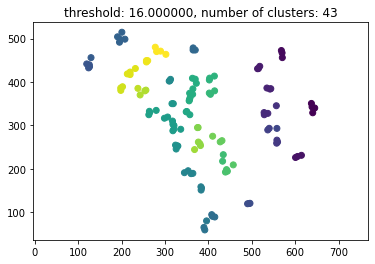

In [31]:
#CLUSTERING AND VISUALIZATION

# clustering
thresh = 16
clusters = hcluster.fclusterdata(data, thresh, criterion="distance")

# plotting
plt.scatter(*numpy.transpose(data), c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

#Actual number of clusters 12c_473_02_04: 75 | Best: 12 / 75
#Actual number of clusters 12c_425_01_07: 42 | Best: 16 / 43